# Bonus Challenge 1 - T-test

In statistics, t-test is used to test if two data samples have a significant difference between their means. There are two types of t-test:

* **Student's t-test** (a.k.a. independent or uncorrelated t-test). This type of t-test is to compare the samples of **two independent populations** (e.g. test scores of students in two different classes). `scipy` provides the [`ttest_ind`](https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.ttest_ind.html) method to conduct student's t-test.

* **Paired t-test** (a.k.a. dependent or correlated t-test). This type of t-test is to compare the samples of **the same population** (e.g. scores of different tests of students in the same class). `scipy` provides the [`ttest_re`](https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.ttest_rel.html) method to conduct paired t-test.

Both types of t-tests return a number which is called the **p-value**. If p-value is below 0.05, we can confidently declare the null-hypothesis is rejected and the difference is significant. If p-value is between 0.05 and 0.1, we may also declare the null-hypothesis is rejected but we are not highly confident. If p-value is above 0.1 we do not reject the null-hypothesis.

Read more about the t-test in [this article](http://b.link/test50) and [this Quora](http://b.link/unpaired97). Make sure you understand when to use which type of t-test. 

In [3]:
# Import libraries
import pandas as pd
import numpy as np
from numpy import random
import math
import scipy.stats as stats
import statistics

import matplotlib.pyplot as plt
import seaborn as sns



#### Import dataset

In this challenge we will work on the Pokemon dataset you have already used. The goal is to test whether different groups of pokemon (e.g. Legendary vs Normal, Generation 1 vs 2, single-type vs dual-type) have different stats (e.g. HP, Attack, Defense, etc.). Use Ironhack's database to load the data (db: pokemon, table: pokemon_stats). 

In [4]:
# Your code here:

pokemon = pd.read_csv('C:/Users/olivi/Documents/Ironhack/DAFT_212/Module_1/Lab_29_Dataframe-Calculations/Pokemon.csv')
pokemon

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [27]:
pokemon['Type 1'].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

In [28]:
pokemon['Type 2'].unique()

array(['Poison', nan, 'Flying', 'Dragon', 'Ground', 'Fairy', 'Grass',
       'Fighting', 'Psychic', 'Steel', 'Ice', 'Rock', 'Dark', 'Water',
       'Electric', 'Fire', 'Ghost', 'Bug', 'Normal'], dtype=object)

<AxesSubplot:>

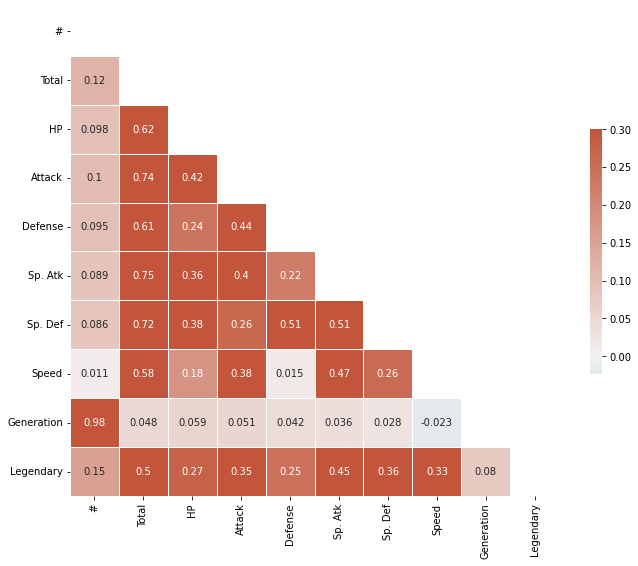

In [8]:
corr = pokemon.corr()

#Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

#### First we want to define a function with which we can test the means of a feature set of two samples. 

In the next cell you'll see the annotations of the Python function that explains what this function does and its arguments and returned value. This type of annotation is called **docstring** which is a convention used among Python developers. The docstring convention allows developers to write consistent tech documentations for their codes so that others can read. It also allows some websites to automatically parse the docstrings and display user-friendly documentations.

Follow the specifications of the docstring and complete the function.

In [34]:
def t_test_features(s1, s2, features=['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Total']):
    """Test means of a feature set of two samples
    
    Args:
        s1 (dataframe): sample 1
        s2 (dataframe): sample 2
        features (list): an array of features to test
    
    Returns:
        dict: a dictionary of t-test scores for each feature where the feature name is the key and the p-value is the value
    """
    results = {}

#Your code here
    for feature in features:
        my_tuple = scipy.stats.ttest_ind(s1[feature], s2[feature])
        results.update({feature : my_tuple[1] })
    
    return results


#### Using the `t_test_features` function, conduct t-test for Lengendary vs non-Legendary pokemons.

*Hint: your output should look like below:*

```
{'HP': 1.0026911708035284e-13,
 'Attack': 2.520372449236646e-16,
 'Defense': 4.8269984949193316e-11,
 'Sp. Atk': 1.5514614112239812e-21,
 'Sp. Def': 2.2949327864052826e-15,
 'Speed': 1.049016311882451e-18,
 'Total': 9.357954335957446e-47}
 ```

In [35]:
# Your code here
a = pokemon[pokemon['Legendary']==1].sample(n=50)
b = pokemon[pokemon['Legendary']==0].sample(n=50)

features = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Total']

t_test_features(a,b, features)


{'HP': 4.549294092603847e-08,
 'Attack': 4.835854614190712e-09,
 'Defense': 9.721753441413612e-07,
 'Sp. Atk': 1.0731192360948588e-12,
 'Sp. Def': 7.873299197424284e-10,
 'Speed': 3.2151791573364144e-10,
 'Total': 5.10117196357314e-21}

#### From the test results above, what conclusion can you make? Do Legendary and non-Legendary pokemons have significantly different stats on each feature?

In [ ]:
# Your comment here

#p-values are so close to zero that we have no other option than reject the null hypothesis ! In other words: Legendary and Non Legendary Pokemons have significantly different stats on each feature !

#### Next, conduct t-test for Generation 1 and Generation 2 pokemons.

In [36]:
# Your code here
a = pokemon[pokemon['Generation']==1].sample(n=100)
b = pokemon[pokemon['Generation']==2].sample(n=100)

features = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Total']

t_test_features(a,b, features)


{'HP': 0.3346758486575103,
 'Attack': 0.20504863252620734,
 'Defense': 0.7014386009568141,
 'Sp. Atk': 0.05102586369697102,
 'Sp. Def': 0.48966303934668487,
 'Speed': 0.002102724090388969,
 'Total': 0.2719170918009929}

#### What conclusions can you make?

In [ ]:
# Your comment here
#All features show very high p-values (much higher than 5%) except for Speed !
# >>> The difference between Generations 1 and 2 seem insignificant except for Speed !

#### Compare pokemons who have single type vs those having two types.

In [40]:
# Your code here

a = pokemon[pokemon['Type 2'].isnull()].sample(n=300)
b = pokemon[pokemon['Type 2'].notnull()].sample(n=300)

t_test_features(a,b, features)


{'HP': 0.3862413391323045,
 'Attack': 0.0005882064686147102,
 'Defense': 9.98606722817636e-07,
 'Sp. Atk': 0.0070139402921178115,
 'Sp. Def': 0.00013742614727318495,
 'Speed': 0.07333607292919567,
 'Total': 1.0768668326349187e-05}

#### What conclusions can you make?

In [ ]:
# Your comment here
#The only p-value where we accept the null hypothesis seems to be on the HP feature!
#For the rest of the features, there seems to be a significant difference between unitype and twin-type Pokemons !

#### Now, we want to compare whether there are significant differences of `Attack` vs `Defense`  and  `Sp. Atk` vs `Sp. Def` of all pokemons. Please write your code below.

*Hint: are you comparing different populations or the same population?*

In [33]:
# Your code here

#Attack vs Defense

features = ['Attack', 'Defense']

a = pokemon.sample(n=800)
b = pokemon.sample(n=800)

t_test_features(a,b, features)


{'Attack': 1.0, 'Defense': 1.0}

#### What conclusions can you make?

In [ ]:
# Your comment here